
CS 210 Project Spotify Liked Songs Analysis
---

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

OPTION 1 - > RUN OPTION 2 IF CHECKING
---
---

In [ ]:
## LOGIN AND SCRAPE CODE FOR SPOTIFY THIS IS OPTION 1

def login_to_spotify(driver, username, password):
    driver.get("https://accounts.spotify.com/en/login")

    time.sleep(5)

    username_field = driver.find_element(By.ID, 'login-username')
    password_field = driver.find_element(By.ID, 'login-password')

    username_field.send_keys(username)
    password_field.send_keys(password)

    login_button = driver.find_element(By.ID, 'login-button')
    login_button.click()

    time.sleep(5)


def scrape_spotify_data(driver):
    driver.get("https://open.spotify.com/collection/tracks")
    time.sleep(20)  # page to load

    songs_data = []
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # load page
        time.sleep(5)

        # calculate new scroll
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

        WebDriverWait(driver, 20).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#main > div > div > div > div.main-view-container > div > div > div > div.main-view-container__scroll-node-child > main > section > div:nth-child(4) > div > div > div:nth-child(2)'))
        )

        # all song items
        songs = driver.find_elements(By.CSS_SELECTOR, '#main > div > div > div > div.main-view-container > div > div > div > div.main-view-container__scroll-node-child > main > section > div:nth-child(4) > div > div > div:nth-child(2) > div')

        for song in songs:
            try:
                # Extracting the song details
                song_name = song.find_element(By.CSS_SELECTOR, 'div:nth-child(1)').text
                publisher = song.find_element(By.CSS_SELECTOR, 'div:nth-child(2)').text
                album = song.find_element(By.CSS_SELECTOR, 'div:nth-child(3)').text
                duration = song.find_element(By.CSS_SELECTOR, 'div:nth-child(4)').text

                song_detail = {
                    "Song Name": song_name,
                    "Publisher": publisher,
                    "Album": album,
                    "Duration": duration
                }

                if song_detail not in songs_data:
                    songs_data.append(song_detail)
            except Exception as e:
                print(f"An error occurred: {e}")
                continue

    return songs_data




In [ ]:
"""
def scrape_spotify_data(driver):
    driver.get("https://open.spotify.com/collection/tracks")
    time.sleep(15)  # Initial wait for the page to load

    songs_data = []
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait for new songs to load
        time.sleep(5)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break  # Break the loop if no new content is loaded
        last_height = new_height

        # After scrolling, wait for songs to be present
        WebDriverWait(driver, 20).until(
            EC.presence_of_all_elements_located((By.XPATH, '//*[@id="main"]/div/div[2]/div[3]/div[1]/div[2]/div[2]/div/div/div[2]/main/section/div[4]/div/div[2]/div[2]/div'))
        )

        # Find all song items in the list
        songs = driver.find_elements(By.XPATH, '//*[@id="main"]/div/div[2]/div[3]/div[1]/div[2]/div[2]/div/div/div[2]/main/section/div[4]/div/div[2]/div[2]/div')

        for song in songs:
            try:
                song_name = song.find_element(By.XPATH, './/div/div[2]/div/a/div').text
                publisher = song.find_element(By.XPATH, './/div/div[2]/div/span/div/a').text
                album = song.find_element(By.XPATH, './/div/div[3]/span/span/a').text
                duration = song.find_element(By.XPATH, './/div/div[5]/div').text
                date_added = song.find_element(By.XPATH, './/div/div[4]/span').text

                song_detail = {
                    "Song Name": song_name,
                    "Publisher": publisher,
                    "Album": album,
                    "Duration": duration,
                    "Date Added": date_added
                }

                if song_detail not in songs_data:  # Avoid duplicates
                    songs_data.append(song_detail)
            except Exception as e:
                # Handle exceptions for individual songs
                print(f"An error occurred while processing a song: {e}")
                continue

    return songs_data
    """

In [ ]:
## LOGGING IN TO SPOTIFY USE IF NEEDED ELSE SKIP -> OPTION 1
# Usage
driver = webdriver.Chrome()

# Use your actual Spotify credentials
login_to_spotify(driver, 'myhotmail@hotmail.com', 'mypassword')

# Perform scraping after successful login
songs_data = scrape_spotify_data(driver)
driver.quit()

# Convert the list of dictionaries to a DataFrame
df_songs = pd.DataFrame(songs_data)


In [ ]:
## OPTION 1 CHECK IF ITS IMPORTED OR NOT STILL OPTION 1
df_songs.head()


""


OPTION 2
---
---

In [ ]:
#OPTION 2 IMPORTING FROM CHOSIC LIKE HW1

myplaylisturl = "https://www.chosic.com/spotify-liked-songs-organizer/"
driver2 = webdriver.Chrome()
driver2.get(myplaylisturl)

##### USING MY OWN CODE BLOCK FROM HW1

cookies = driver2.get_cookies()

cookie_name = "cf_chl_2"
cookie_name2 = "cf_clearence"

cookie_to_delete = next((cookie for cookie in cookies if cookie['name'] == cookie_name), None)

if cookie_to_delete:
    driver2.delete_cookie(cookie_name)
    driver2.delete_cookie(cookie_name2)

driver2.add_cookie({'name': 'cf_clearance', 'value': 'VFqmv4UHnhW.jqz4g42jcmKUiUH9KgRESuu05sDpjqg-1704478334-0-2-b55e00d6.553cefe0.e25f5f36-250.0.0'})

driver2.refresh()

time.sleep(90)

export_button = driver2.find_element(By.XPATH, '//*[@id="export"]')
export_button.click()

driver2.quit()

CSV to Dataframe
---

In [ ]:
## csv to dataframe
df = pd.read_csv('AlaraBenliogluLikedSongs.csv', error_bad_lines=False)

df



/var/folders/ck/hl0bm7bx7pjb6v65rqz4__sc0000gn/T/ipykernel_78374/1848471999.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('AlaraBenliogluLikedSongs.csv', error_bad_lines=False)


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,The Chase,Emmit Fenn,69,194,chill house,Electronic,"The Last Dance, Pt 2",2022-03-24,03:13,...,10,-14,G#/A♭ Major,4,2024-01-15,0SANWT6WZgajOViFe0EkCO,TH3RD BRAIN,4B,https://p.scdn.co/mp3-preview/b075f942ab246127...,https://i.scdn.co/image/ab67616d0000485182894b...
1,2,Control,Emmit Fenn,68,120,chill house,Electronic,The Last Dance,2019-03-28,02:50,...,10,-9,B Minor,4,2024-01-15,02VX51QXZlZcubvkm5mQGg,TH3RD BRAIN,10A,https://p.scdn.co/mp3-preview/3226081e2086ce9e...,https://i.scdn.co/image/ab67616d00004851720116...
2,3,Sonnentanz - Sun Don't Shine,"Klangkarussell,Will Heard",72,120,"austrian pop, deep euro house, uk contemporary...","Pop, Electronic, R&B",Netzwerk,2014-01-01,03:58,...,10,-8,F Minor,4,2024-01-14,6Qi0Wls2EaolwPMPMxfe5f,Virgin,4A,https://p.scdn.co/mp3-preview/6875d6d33edc26df...,https://i.scdn.co/image/ab67616d00004851e37608...
3,4,Sorry (with Madonna),"BLOND:ISH,Madonna,Eran Hersh,Darmon",69,124,"deep disco house, melodic house, dance pop, pop,","Pop, Electronic",Sorry (with Madonna),2023-02-10,02:41,...,20,-8,C Major,4,2024-01-13,5dW0cgZ9uV1W3PXtuTS5uP,Insomniac Records,8B,https://p.scdn.co/mp3-preview/d78e973a2b709054...,https://i.scdn.co/image/ab67616d00004851d215b0...
4,5,All Over My Body,"Ben Sterling,Superchumbo",40,126,"tech house, uk tech house, tribal house, vocal...",Electronic,All Over My Body,2023-05-19,06:36,...,10,-12,A Major,4,2024-01-13,5aDXYU6vSnULQ0D3WMaC6Z,Diynamic Music,11B,https://p.scdn.co/mp3-preview/bc213d7fe0f0b26c...,https://i.scdn.co/image/ab67616d00004851f533a4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Vivir - S.I.S Project Deep House Remix,"Omar Faruk Tekbilek,Yasmin Levy,S.I.S Project",35,105,"arab folk, arabic jazz, belly dance, turkish i...","Folk/Acoustic, Jazz, Pop, World/Traditional","LifeArt, Vivir",2020-08-21,05:52,...,0,-10,A#/B♭ Minor,4,2022-08-30,0N5OzOf6EduJy6IsYlEgig,LifeArt,3A,https://p.scdn.co/mp3-preview/849fb76a67ccd905...,https://i.scdn.co/image/ab67616d00004851379641...
251,252,Defoluyorum,Emir Can İğrek,67,91,turkish alt pop,Pop,Defoluyorum,2019-02-18,02:45,...,0,-17,F Minor,5,2022-08-29,5u5gH4rQXu8zo3G3Y7D4Td,Hypers,4A,https://p.scdn.co/mp3-preview/2d2c7ea2e2c4851f...,https://i.scdn.co/image/ab67616d0000485178f12a...
252,253,Derinlerde,"Mark Eliyahu,Cem Adrian",68,128,"turkish instrumental, turkish rock, turkish si...","World/Traditional, Rock, Pop",Derinlerde,2021-06-16,03:21,...,10,-12,C Minor,4,2022-08-29,15Wl8jVyU8t3tuFJHEFcCw,Mark Eliyahu,5A,https://p.scdn.co/mp3-preview/0352cc5f2ecd6726...,https://i.scdn.co/image/ab67616d00004851e77aab...
253,254,Uzunlar - V1,Evdeki Saat,69,170,"turkish alt pop, turkish alternative rock, tur...","Pop, Rock",Uzunlar,2020-02-14,04:42,...,0,-10,G Minor,4,2022-08-27,1vLkBVAy8ZWrqcQjYTPP3a,AVRUPA MÜZİK YAPIM,6A,https://p.scdn.co/mp3-preview/253bc1b33bf3b85f...,https://i.scdn.co/image/ab67616d00004851917b71...


TOP GENRES
---

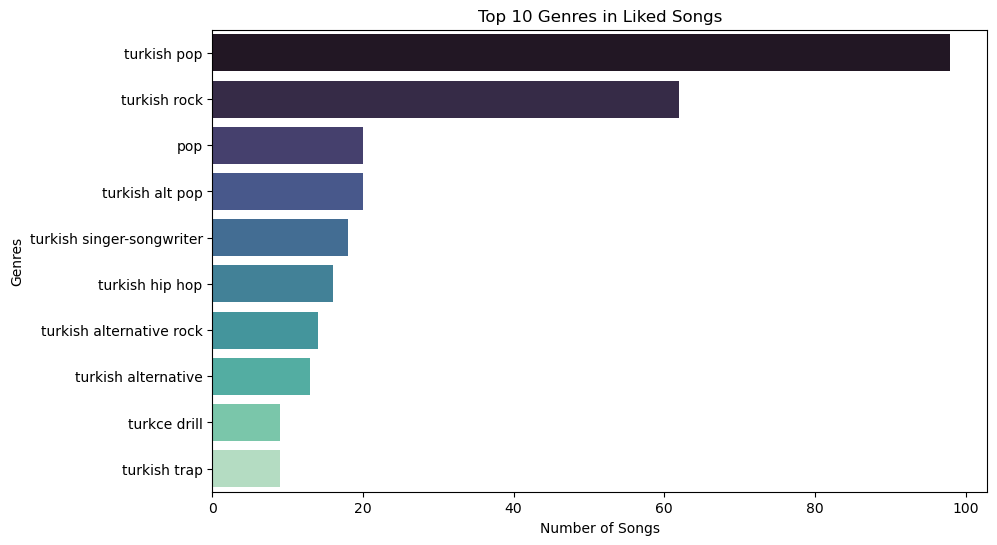

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

# 'Genres' column to count each genre occurrence
genre_lists = df['Genres'].dropna().str.split(', ')
all_genres = list(itertools.chain(*genre_lists))
genre_counts = Counter(all_genres)

# top 10 genres
top_genres = dict(genre_counts.most_common(10))

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='mako')
plt.title('Top 10 Genres in Liked Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Genres')
plt.show()


BELOVED ARTISTS
---

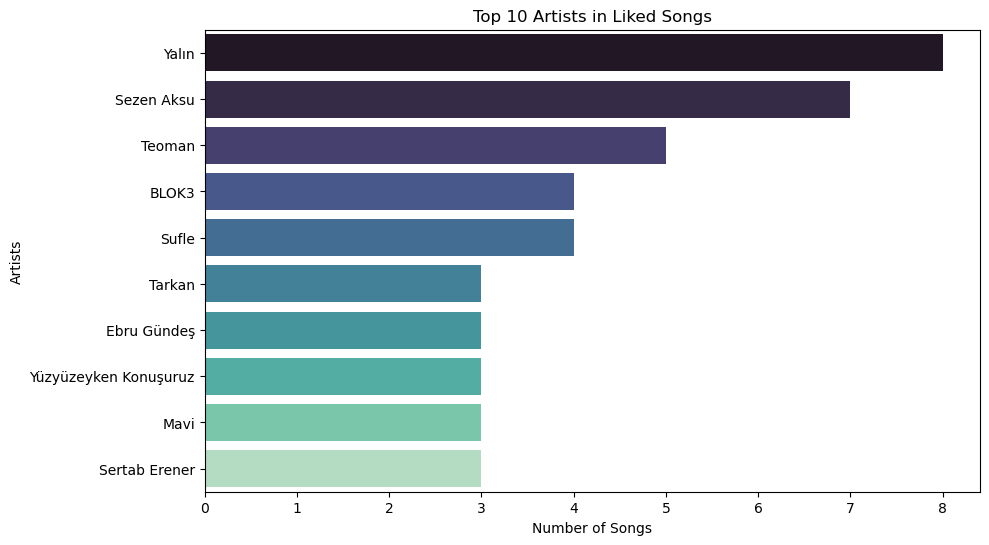

In [ ]:
artist_counts = df['Artist'].value_counts()

# top10artist
top_artists = artist_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')
plt.title('Top 10 Artists in Liked Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()


MONTHLY EMOTIONAL ATTRIBUTES OF LIKED SONGS
---

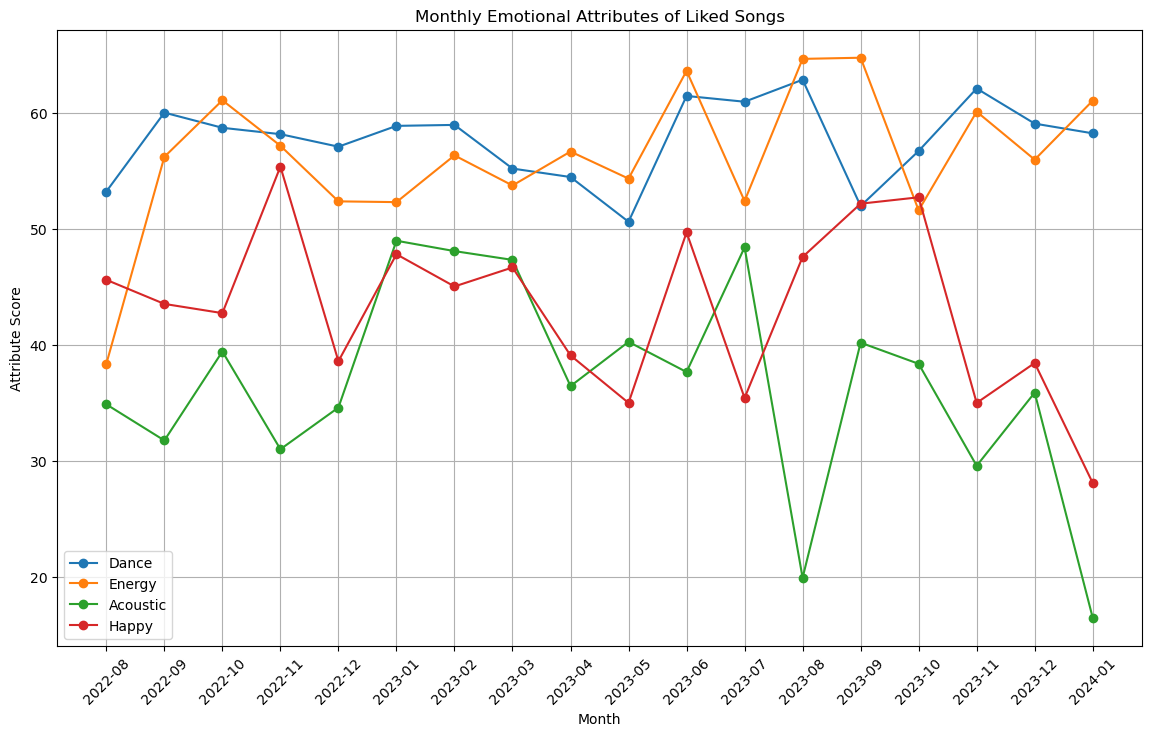

In [ ]:
# to datetime
df['Added Month'] = pd.to_datetime(df['Added At']).dt.to_period('M')

emotional_attributes = ['Dance', 'Energy', 'Acoustic', 'Happy']
monthly_emotion = df.groupby('Added Month')[emotional_attributes].mean()

# plotting
plt.figure(figsize=(14, 8))
for attribute in emotional_attributes:
    plt.plot(monthly_emotion.index.astype(str), monthly_emotion[attribute], label=attribute, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Emotional Attributes of Liked Songs')
plt.xlabel('Month')
plt.ylabel('Attribute Score')
plt.legend()
plt.grid(True)
plt.show()




SEASONAL EMOTINAL ATTRIBUTES
---

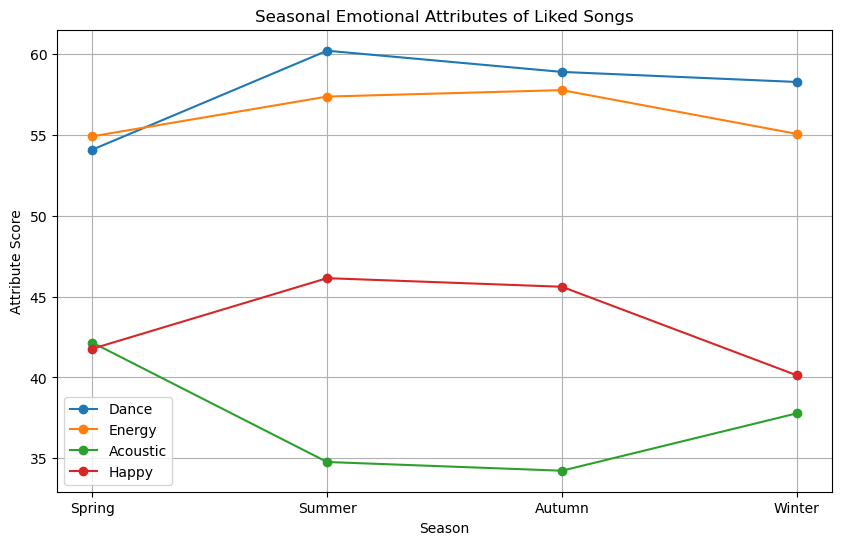

In [ ]:
import numpy as np

# map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# month from 'Added At'
df['Season'] = pd.to_datetime(df['Added At']).dt.month.apply(month_to_season)

# emotional attributes/ season
seasonal_emotion = df.groupby('Season')[emotional_attributes].mean().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

plt.figure(figsize=(10, 6))
for attribute in emotional_attributes:
    plt.plot(seasonal_emotion.index, seasonal_emotion[attribute], label=attribute, marker='o')
plt.title('Seasonal Emotional Attributes of Liked Songs')
plt.xlabel('Season')
plt.ylabel('Attribute Score')
plt.legend()
plt.grid(True)
plt.show()


YEARLY PATTERNS
---

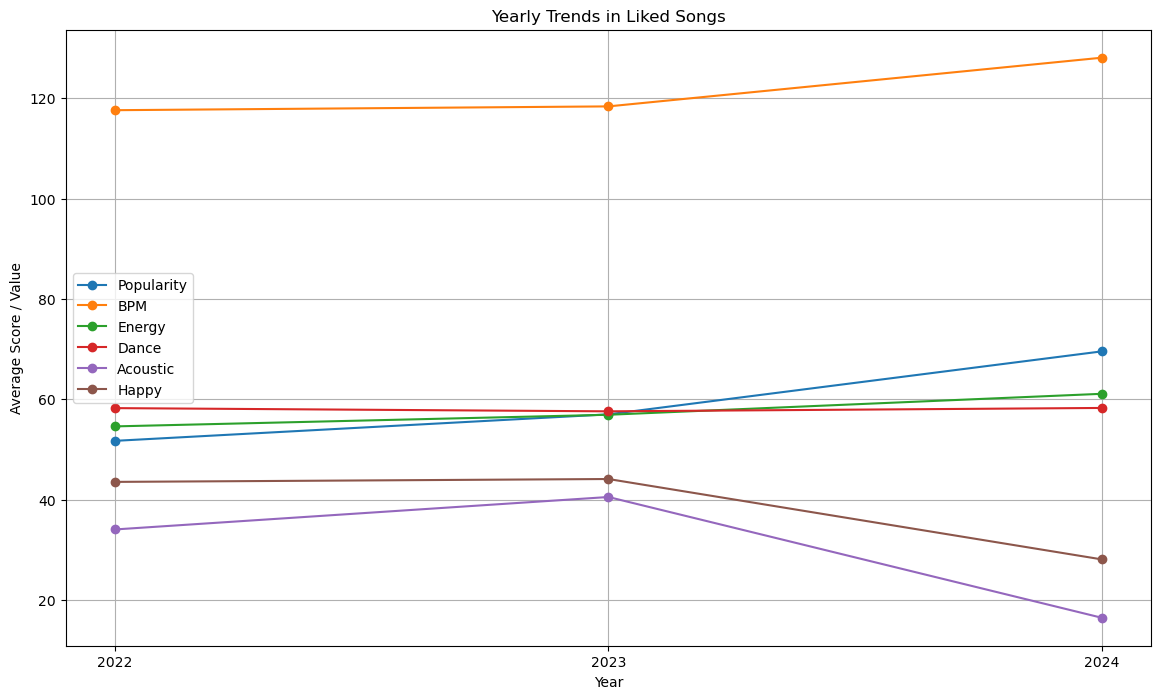

In [ ]:
# year from 'Added At'
df['Added Year'] = pd.to_datetime(df['Added At']).dt.year

yearly_attributes = ['Popularity', 'BPM', 'Energy', 'Dance', 'Acoustic', 'Happy']
yearly_stats = df.groupby('Added Year')[yearly_attributes].mean()

plt.figure(figsize=(14, 8))
for attribute in yearly_attributes:
    plt.plot(yearly_stats.index, yearly_stats[attribute], label=attribute, marker='o')
plt.title('Yearly Trends in Liked Songs')
plt.xlabel('Year')
plt.ylabel('Average Score / Value')
plt.xticks(yearly_stats.index)
plt.legend()
plt.grid(True)
plt.show()


MOOD ANALYSIS OVER TIME
---

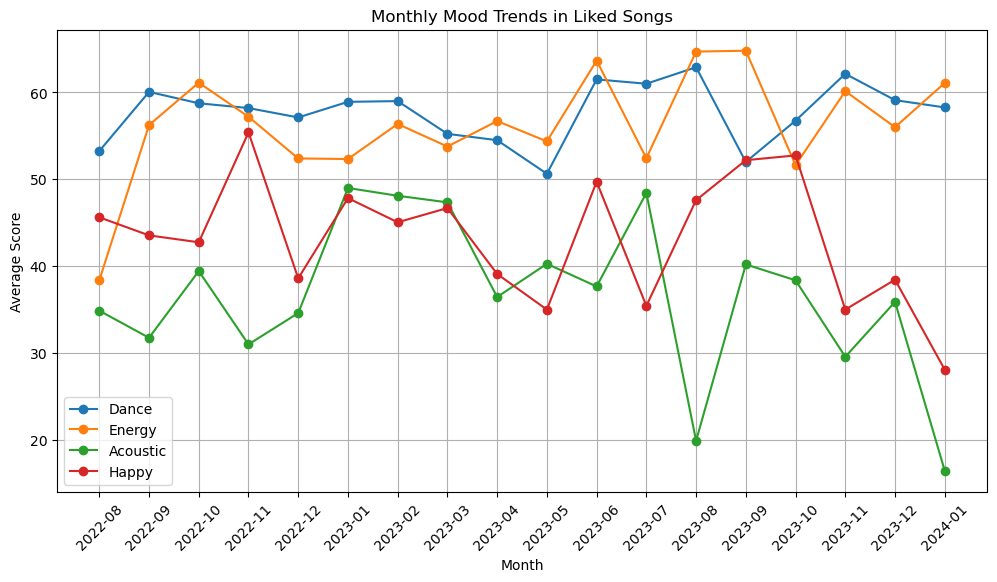

In [ ]:
# Yearly Mood Trends
yearly_mood = df.groupby('Added Year')[emotional_attributes].mean()

# Monthly Mood Trends
monthly_mood = df.groupby('Added Month')[emotional_attributes].mean()

plt.figure(figsize=(12, 6))
for attribute in emotional_attributes:
    plt.plot(monthly_mood.index.astype(str), monthly_mood[attribute], label=attribute, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Mood Trends in Liked Songs')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()


---
Artist & Genre Trends Over Time

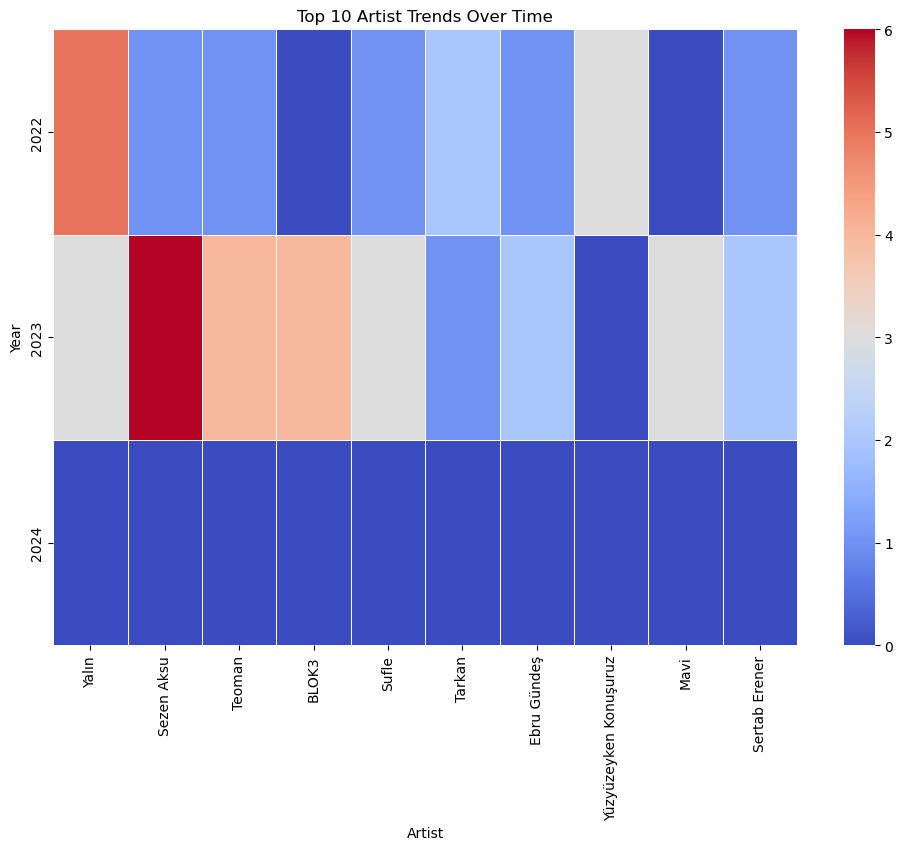

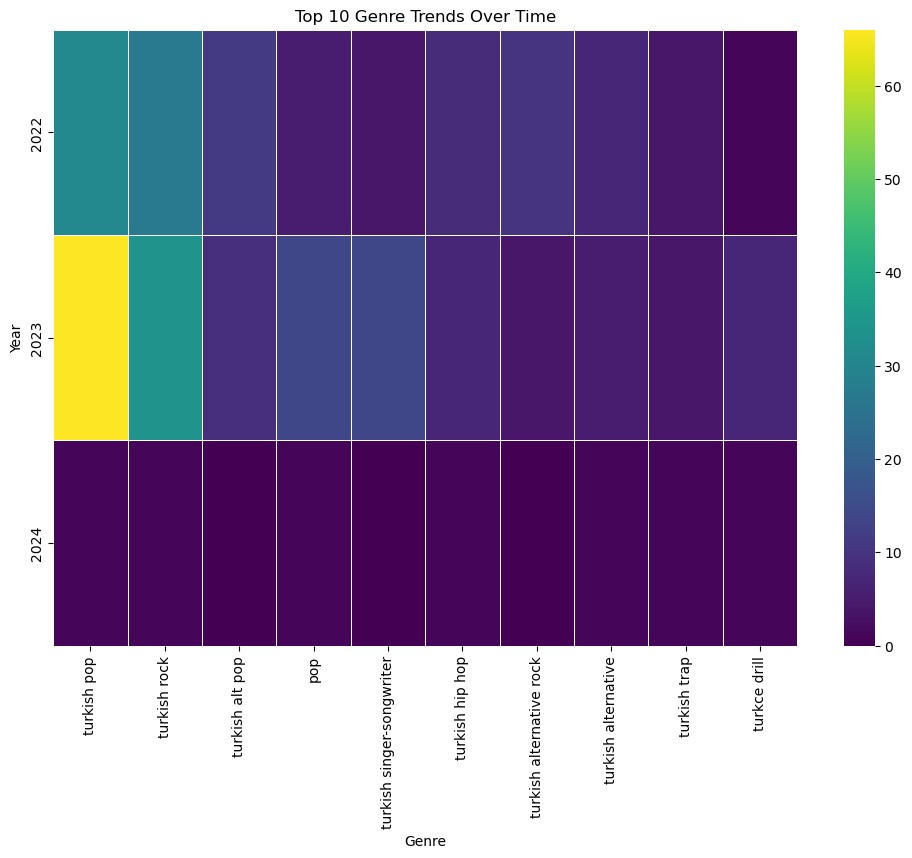

In [ ]:
# Artist Trends Over Time

# grouping data by year and artist + top 10 artists
top_10_artists = df['Artist'].value_counts().head(10).index

filtered_artist_trends = artist_trends[top_10_artists]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_artist_trends, cmap='coolwarm', linewidths=.5)
plt.title('Top 10 Artist Trends Over Time')
plt.xlabel('Artist')
plt.ylabel('Year')
plt.show()


# total songs for each genre
genre_counts = genre_year_df['Genre'].value_counts()

# top10gerne
top_10_genres = genre_counts.head(10).index

filtered_genre_trends = genre_trends[top_10_genres]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_genre_trends, cmap='viridis', linewidths=.5)
plt.title('Top 10 Genre Trends Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()



---
Seasonal Analysis for Genres

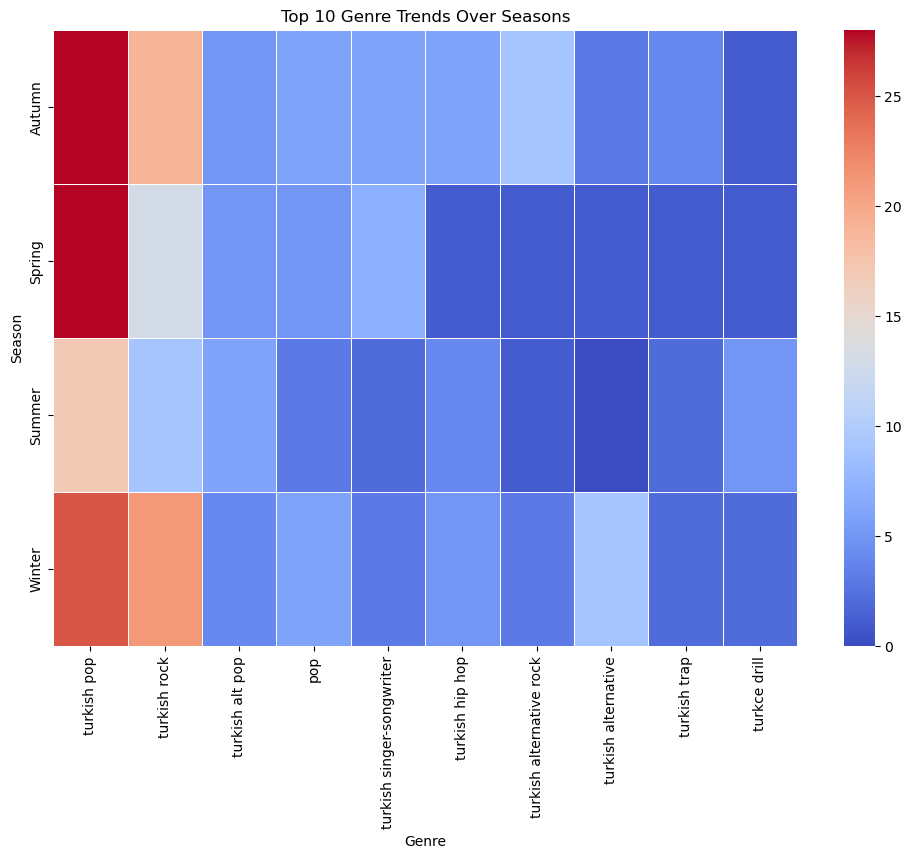

In [ ]:
def explode_genres_season(row):
    if pd.notna(row['Genres']):
        return [(row['Season'], genre) for genre in row['Genres'].split(', ')]
    return []

genre_rows_seasonal = df.apply(explode_genres_season, axis=1).explode().dropna()
genre_season_df = pd.DataFrame(genre_rows_seasonal.tolist(), columns=['Season', 'Genre'])

genre_trends_seasonal = genre_season_df.groupby(['Season', 'Genre']).size().unstack(fill_value=0)

genre_counts = genre_season_df['Genre'].value_counts()

top_10_genres = genre_counts.head(10).index

filtered_genre_trends_seasonal = genre_trends_seasonal[top_10_genres]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_genre_trends_seasonal, cmap='coolwarm', linewidths=.5)
plt.title('Top 10 Genre Trends Over Seasons')
plt.xlabel('Genre')
plt.ylabel('Season')
plt.show()


Machine Learning
---

---
Training 1

In [ ]:
# Data Preprocessing

# Dropping rows with missing 'Genres'
df_clean = df.dropna(subset=['Genres'])

# Splitting the genres string into a list of genres
df_clean['Genres'] = df_clean['Genres'].str.split(', ')

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Encoding the genres
genres_encoded = mlb.fit_transform(df_clean['Genres'])

# Selecting features
features = df_clean[['Popularity', 'BPM', 'Energy', 'Dance', 'Acoustic', 'Happy']]

# Imputing missing values in features
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, genres_encoded, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Checking the shapes of y_test and y_pred
y_test.shape, y_pred.shape


/var/folders/ck/hl0bm7bx7pjb6v65rqz4__sc0000gn/T/ipykernel_78374/1998616329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genres'] = df_clean['Genres'].str.split(', ')


((49, 148), (49, 148))

In [ ]:
print(y_test.shape)
print(y_pred.shape)

(49, 148)
(49, 148)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# classification report
report = classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0, output_dict=True)

report_df = pd.DataFrame(report).transpose()

sorted_report_df = report_df.sort_values(by='f1-score', ascending=False)

sorted_report_df.head()  # display top rows


,precision,recall,f1-score,support
turkish pop,0.888889,0.470588,0.615385,17.0
pop,0.666667,0.400000,0.500000,5.0
samples avg,0.224490,0.159864,0.176871,123.0
micro avg,0.785714,0.089431,0.160584,123.0
turkish rock,0.500000,0.076923,0.133333,13.0


---
Popularity Prediction Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Popularity Prediction Model
# features and target for the regression model
regression_features = df_clean[['BPM', 'Energy', 'Dance', 'Acoustic', 'Happy']]
popularity_target = df_clean['Popularity']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(regression_features, popularity_target,
                                                                    test_size=0.2, random_state=42)

# Random Forest Regressor - popularity prediction
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

popularity_pred = rf_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, popularity_pred)
r2 = r2_score(y_test_reg, popularity_pred)

print("MSE: ", mse)
print("R^2 score: ", r2)



MSE:  421.8217857142857
R^2 score:  -0.29308271730248703


---
MOOD BASED RECOMMENDATION FOR EACH SEASON

In [ ]:
# Mood-Based Recommendations for Each Season
# season and mood attributes
seasonal_mood_data = df_clean[['Season', 'Dance', 'Energy', 'Acoustic', 'Happy']]

# avg mood scores
average_moods_per_season = seasonal_mood_data.groupby('Season').mean()

# matching mood profile
def recommend_songs_for_season(season):
    season_mood_profile = average_moods_per_season.loc[season]
    # Calculating the difference between each song's mood and the season's average mood
    mood_difference = seasonal_mood_data.drop('Season', axis=1).sub(season_mood_profile).abs().sum(axis=1)
    # Finding the songs with the smallest difference
    closest_matches = mood_difference.nsmallest(5).index
    return df_clean.iloc[closest_matches][['Song', 'Artist', 'Season']]


print('Average Moods/Season: ')
average_moods_per_season


Average Moods/Season: 


,Dance,Energy,Acoustic,Happy
Season,,,,
Autumn,59.160000,58.626667,33.386667,45.213333
Spring,54.370370,55.296296,43.037037,41.518519
Summer,60.425000,58.125000,34.475000,46.975000
Winter,57.722222,55.611111,36.958333,39.513889


---
Spring Recommendation

In [ ]:
spring_songs = recommend_songs_for_season('Spring')
spring_songs


,Song,Artist,Season
244,Beni Hatırladın mı,"Cem Adrian,Birsen Tezer",Autumn
135,Unuttun Mu Beni,Nahide Babashlı,Winter
119,Arada Bir,Kibariye,Spring
88,Nazar Değmesin,Gülşen,Spring
103,Esmer Günler,Nilüfer,Spring


---
Summer Recommendation

In [ ]:
summer_songs = recommend_songs_for_season('Summer')
summer_songs

,Song,Artist,Season
231,Ayrılık Zor,Tarkan,Autumn
93,Cevapsız Sorular,maNga,Spring
160,Shallow,"Lady Gaga,Bradley Cooper",Winter
22,Sevdanın Rengi,Özcan Deniz,Autumn
241,Diğer Yarım,ATE,Autumn


---
Autumn Recommendation

In [ ]:
autumn_songs = recommend_songs_for_season('Autumn')
autumn_songs

,Song,Artist,Season
160,Shallow,"Lady Gaga,Bradley Cooper",Winter
231,Ayrılık Zor,Tarkan,Autumn
93,Cevapsız Sorular,maNga,Spring
88,Nazar Değmesin,Gülşen,Spring
22,Sevdanın Rengi,Özcan Deniz,Autumn


---
Winter Recommendation

In [ ]:
winter_songs = recommend_songs_for_season('Winter')
winter_songs

,Song,Artist,Season
231,Ayrılık Zor,Tarkan,Autumn
88,Nazar Değmesin,Gülşen,Spring
244,Beni Hatırladın mı,"Cem Adrian,Birsen Tezer",Autumn
160,Shallow,"Lady Gaga,Bradley Cooper",Winter
93,Cevapsız Sorular,maNga,Spring
